In [ ]:
import re
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import zero_one_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import balanced_accuracy_score

In [ ]:
df = pd.read_excel('Data_Train.xlsx')
df1 = pd.read_excel('Test_set.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
y = df['Price']

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df1.shape

(2671, 10)

In [ ]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [ ]:
X = df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']]
X = X.append(df1)

In [ ]:
X.shape

(13354, 10)

In [ ]:
X['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
X['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
X['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
# X[X['Destination']=='New Delhi']['Destination'] = X[X['Destination']=='New Delhi']['Destination'].replace('Delhi','New Delhi',inplace = True)

In [ ]:
X['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
X.loc[X['Total_Stops']=='non-stop','Total_Stops'] = "0"
# X.loc[X['Total_Stops']=='NaN','Total_Stops'] = "0"
X.loc[X['Total_Stops']=='1 stop','Total_Stops'] = "1"
X.loc[X['Total_Stops']=='2 stops','Total_Stops'] = "2"
X.loc[X['Total_Stops']=='3 stops','Total_Stops'] = "3"
X.loc[X['Total_Stops']=='4 stops','Total_Stops'] = "4"

# df.loc[df['A'] > 2, 'B'] = new_val



In [ ]:
X['Total_Stops'].unique()

array(['0', '2', '1', '3', nan, '4'], dtype=object)

In [ ]:
X['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df.loc[df['Additional_Info']=='No info','Additional_Info'] = "No"
df.loc[df['Additional_Info']=='No Info','Additional_Info'] = "No"
df.loc[df['Additional_Info']=='In-flight meal not included','Additional_Info'] = "No_meal"
df.loc[df['Additional_Info']=='No check-in baggage included','Additional_Info'] = "Nobag"
df.loc[df['Additional_Info']=='1 Short layover','Additional_Info'] = "1ShortLay"
df.loc[df['Additional_Info']=='1 Long layover','Additional_Info'] = "1LongLay"
df.loc[df['Additional_Info']=='Change airports','Additional_Info'] = "Chng_pots"
df.loc[df['Additional_Info']=='Business class','Additional_Info'] = "Business"
df.loc[df['Additional_Info']=='Red-eye flight','Additional_Info'] = "Redeye"
df.loc[df['Additional_Info']=='2 Long layover','Additional_Info'] = "2longlay"



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


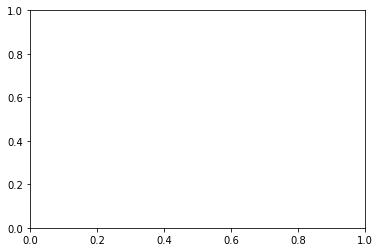

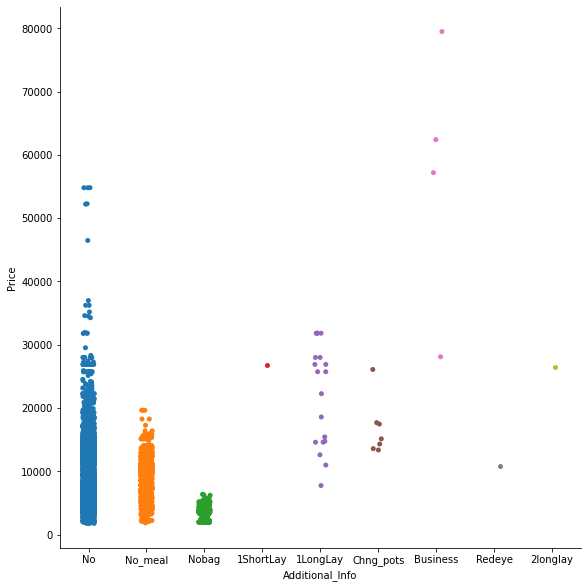

In [ ]:
# # plot
# sns.set_style('ticks')
fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(11.7, 8.27)
sns.catplot(ax = ax , x="Additional_Info", y="Price", height=8.27,data=df)
# sns.despine()

# fig.savefig('example.png')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


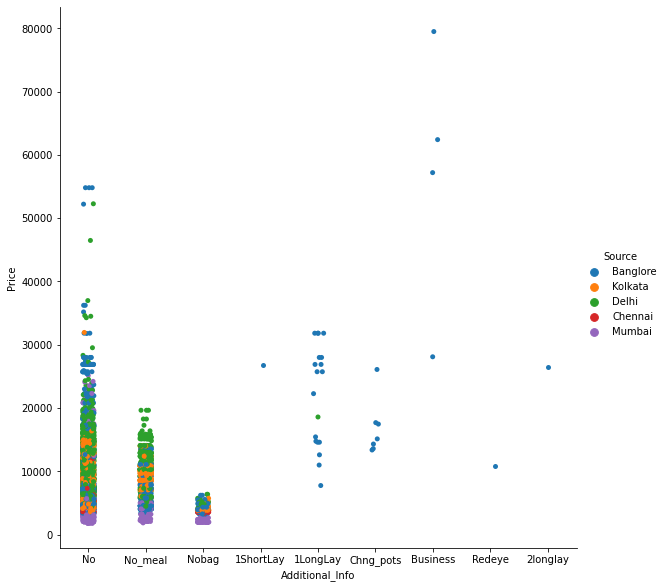

In [ ]:
sns.catplot(ax = ax , x="Additional_Info", y="Price", height=8.27,hue = 'Source',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


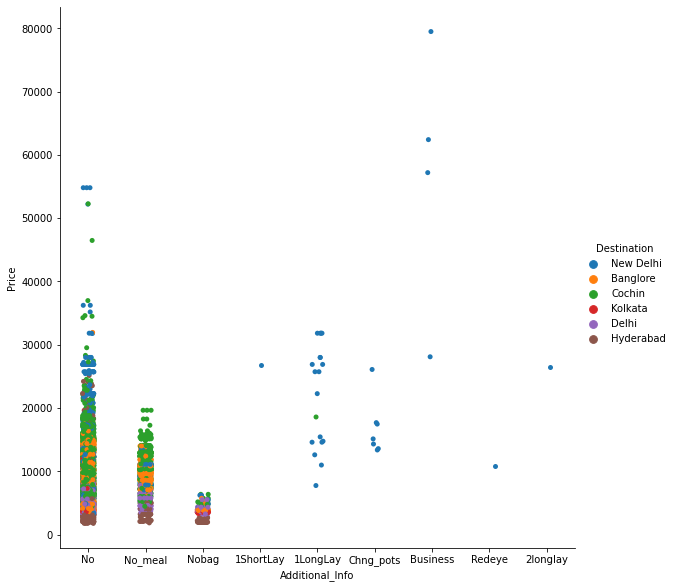

In [ ]:
sns.catplot(ax = ax , x="Additional_Info", y="Price",hue = "Destination", height=8.27,data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


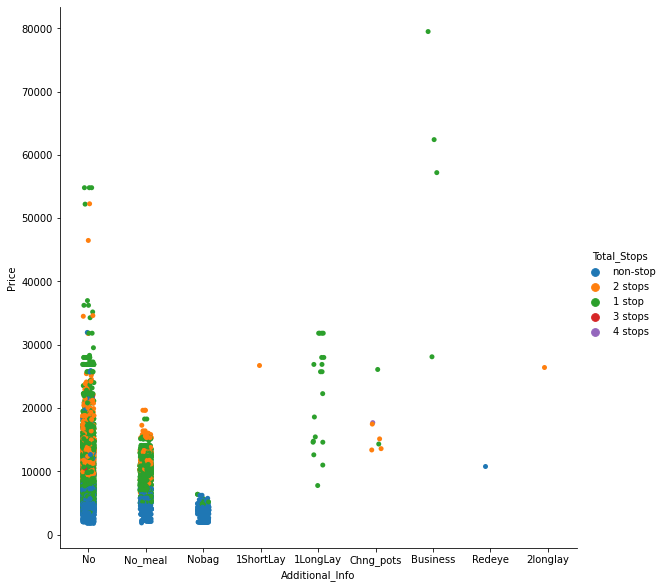

In [ ]:
sns.catplot(ax = ax , x="Additional_Info", y="Price", height=8.27,hue = 'Total_Stops',data=df)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


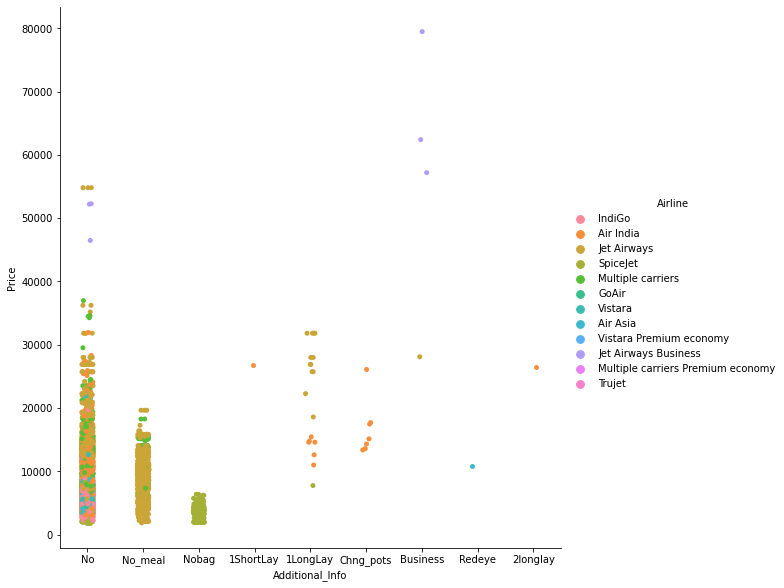

In [ ]:
sns.catplot(ax = ax , x="Additional_Info", y="Price", height=8.27,hue = 'Airline',data=df)




> Working on Missing Values



In [ ]:
X.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
dtype: bool

In [ ]:
X.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
dtype: int64

In [ ]:
X[X["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info


In [ ]:
X[X["Destination"]=='Cochin']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1,No info
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2,No info
16,SpiceJet,15/04/2019,Delhi,Cochin,DEL → PNQ → COK,08:45,13:15,4h 30m,1,No info
...,...,...,...,...,...,...,...,...,...,...
2661,Jet Airways,27/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,04:25 29 Mar,33h 15m,2,No info
2664,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,15:15,01:30 16 Jun,10h 15m,1,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1,No info


In [ ]:
X[X["Route"].isnull()]['Route']='DEL->COK'
X[X["Route"].isnull()]['Total_Stops']=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X['Total_Stops'].fillna(0,inplace=True)

In [ ]:
X.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
dtype: bool

In [ ]:
X = X.drop(columns=['Route'])

In [ ]:
X.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
dtype: bool

In [ ]:
X['Total_Stops'] = X['Total_Stops'].astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Dep_Time         13354 non-null  object
 5   Arrival_Time     13354 non-null  object
 6   Duration         13354 non-null  object
 7   Total_Stops      13354 non-null  int64 
 8   Additional_Info  13354 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB




> Dealing with date, time columns



In [ ]:
len(X['Date_of_Journey'].unique())

44

In [ ]:
X['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [ ]:
df.shape[0]/44

242.79545454545453

In [ ]:
s = "24/03/2019"

In [ ]:
t = s.split('/')
t[1]

'03'

In [ ]:
def month1(text):
  return text.split('/')[1]

In [ ]:
X['Date_of_Journey'] = X['Date_of_Journey'].apply(month)
X.columns
X.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,03,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info
1,Air India,05,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info
2,Jet Airways,06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info
3,IndiGo,05,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info
4,IndiGo,03,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info


In [ ]:
X.loc[X['Date_of_Journey']=='01','Date_of_Journey'] = 'Jan'
X.loc[X['Date_of_Journey']=='02','Date_of_Journey'] = 'Feb'
X.loc[X['Date_of_Journey']=='03','Date_of_Journey'] = 'Mar'
X.loc[X['Date_of_Journey']=='04','Date_of_Journey'] = 'Apr'
X.loc[X['Date_of_Journey']=='05','Date_of_Journey'] = 'May'
X.loc[X['Date_of_Journey']=='06','Date_of_Journey'] = 'June'
X.loc[X['Date_of_Journey']=='07','Date_of_Journey'] = 'July'
X.loc[X['Date_of_Journey']=='08','Date_of_Journey'] = 'Aug'
X.loc[X['Date_of_Journey']=='09','Date_of_Journey'] = 'Sep'
X.loc[X['Date_of_Journey']=='10','Date_of_Journey'] = 'Oct'
X.loc[X['Date_of_Journey']=='11','Date_of_Journey'] = 'Nov'
X.loc[X['Date_of_Journey']=='12','Date_of_Journey'] = 'Dec'
# X.loc[X['Total_Stops']=='non-stop','Total_Stops'] = "0"


In [ ]:
X.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,Mar,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info
1,Air India,May,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info
2,Jet Airways,June,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info
3,IndiGo,May,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info
4,IndiGo,Mar,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info




> Changing Duration column to Flight duration in Minutes



In [ ]:
X['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
d1 = "2h 50m"
d1.split(' ')

['2h', '50m']

In [ ]:
d2 = "19h"
d2.split(' ')[0][0]

'1'



> Function for conversion



In [ ]:
def duration(text):
  sp = text.split(" ")
  if len(sp)==1:
    if sp[0][1]=="h":
      hour = sp[0]
      minutes = 60 * int(hour.strip('h'))
    
    elif sp[0][1]=='m':
      minute = sp[0]
      minutes = int(minute.strip('m'))
    elif sp[0][2]=='h':
      hour = sp[0]
      minutes = 60 * int(hour.strip('h'))
    elif sp[0][2]=="m":
      minute = sp[0]
      minutes = int(minute.strip('m'))

  if len(sp)==2:
    hour = sp[0]
    minute = sp[1]
    minutes = (60 * int(hour.strip('h'))) + int(minute.strip("m"))
  return minutes

In [ ]:
X['Duration'] = X['Duration'].apply(duration)

In [ ]:
X['Duration'].isna().sum()

0

In [ ]:
'19h'.split(' ')[0][2]

'h'

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Dep_Time         13354 non-null  object
 5   Arrival_Time     13354 non-null  object
 6   Duration         13354 non-null  int64 
 7   Total_Stops      13354 non-null  int64 
 8   Additional_Info  13354 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
X = X.drop(columns=['Dep_Time','Arrival_Time'])


KeyError: ignored

In [ ]:
X = pd.get_dummies(X,drop_first = True)

In [ ]:
X.shape

(13354, 34)

In [ ]:
df1.shape

(2671, 10)

In [ ]:
13354-2671

10683

In [ ]:
test = X[10683:]

In [ ]:
X_train = X[:10683]

In [ ]:
test.shape

(2671, 34)

In [ ]:
X_train.shape

(10683, 34)

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(booster = "gbtree",tree_method="hist")
xgb.fit(X_train,y)

[12:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='hist', verbosity=1)

In [ ]:
y_pred = xgb.predict(test)

In [ ]:
df3 = pd.DataFrame(y_pred)

In [ ]:
df3.to_csv('result.csv')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size = 0.25, random_state = 0)

In [ ]:
xgb = XGBRegressor(booster = "gbtree",max_depth = 5,n_estimators = 350,min_child_weight=1,learning_rate = 0.1)
xgb.fit(x_train,y_train)

[12:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred2 = xgb.predict(X_test)

In [ ]:
1 - np.sqrt(np.square(np.log10(y_pred2 +1) - np.log10(y_test +1)).mean())

0.9127613019593711

In [ ]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [ ]:
get_best_distribution(X)

ValueError: ignored

In [ ]:
# # Applying k-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = xgb, X = x_train, y = y_train, cv = 10)
# accuracies.std()
# accuracies.mean()

[12:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.7769992137343589

In [ ]:
# from sklearn.metrics import explained_variance_score
# explained_variance_score(y_test, y_pred2)

0.7443215062058179

In [ ]:
# from sklearn.metrics import r2_score
# r = r2_score(y_test, y_pred2)
# r

0.7443197140753148